<a href="https://colab.research.google.com/github/cdmafAdi/DL_NOTES-/blob/main/7_Digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
len(x_train)

60000

In [ ]:
len(y_test)

10000

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

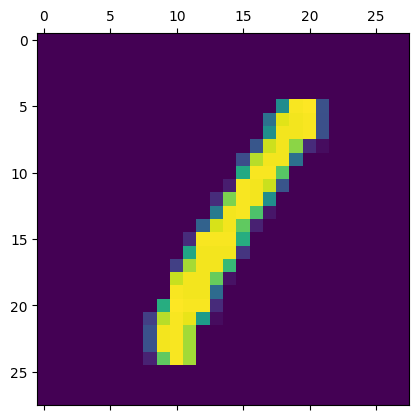

In [ ]:
plt.matshow(x_train[3])

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
# flatten of array
x_train_flatten = x_train.reshape(len(x_train),28*28)
x_test_flatten = x_test.reshape(len(x_test),28*28)

In [ ]:
x_train_flatten.shape

(60000, 784)

In [ ]:
# creting a simple neural network

model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784,), activation='sigmoid')
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8211 - loss: 0.7030
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9134 - loss: 0.3087
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9220 - loss: 0.2818
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9242 - loss: 0.2772
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9257 - loss: 0.2670


In [ ]:
# if accuracy is low then there is nedd to scale the the value in array inform of range 0 -> 1, cause 0-> 255

In [ ]:
# checking accuracy of validation

model.evaluate(x_test_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9161 - loss: 0.3019


[0.2656968832015991, 0.926800012588501]

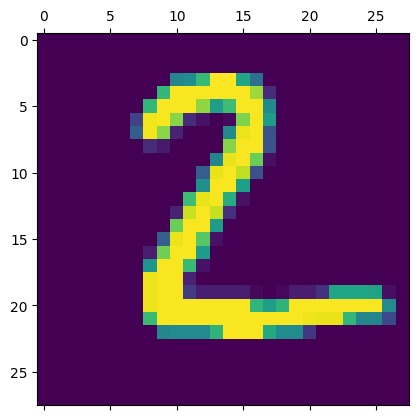

In [ ]:
plt.matshow(x_test[1])

In [ ]:
y_predict = model.predict(x_test_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
y_predict[0]

array([1.4114110e-02, 2.3138283e-07, 6.8072550e-02, 9.3438292e-01,
       1.5403081e-03, 8.8460237e-02, 1.6638108e-06, 9.9966240e-01,
       7.6380685e-02, 6.6893297e-01], dtype=float32)

In [ ]:
# here i the predicted value
np.argmax(y_predict[1])

np.int64(2)

In [ ]:
# now let's build a confusion matrix

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predict]
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    4,    2,    0,    5,   10,    2,    1,    1],
       [   0, 1114,    4,    2,    0,    1,    3,    2,    9,    0],
       [   4,    8,  951,    8,    7,    5,   11,    9,   24,    5],
       [   2,    0,   32,  913,    0,   25,    1,    9,   19,    9],
       [   1,    1,    9,    0,  902,    0,   13,    4,    9,   43],
       [   8,    3,    7,   30,    7,  788,   14,    4,   24,    7],
       [   9,    3,    9,    1,    7,   12,  914,    2,    1,    0],
       [   1,    5,   26,    4,    6,    1,    0,  946,    2,   37],
       [   7,    8,   11,   20,    9,   32,    9,   10,  857,   11],
       [  10,    7,    2,   10,   23,    6,    0,   18,    5,  928]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

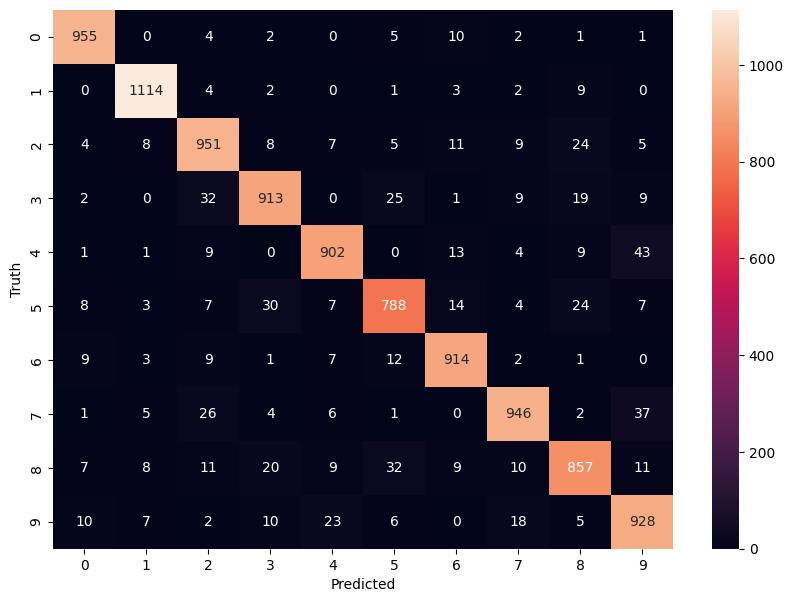

In [ ]:
# to visulaize this confusion matrix we can do like

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# now let's add hidden layer

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flatten,y_train,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8833 - loss: 0.4300
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9629 - loss: 0.1284
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9741 - loss: 0.0863
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9803 - loss: 0.0646
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9851 - loss: 0.0501


In [ ]:
# cm = tf.math.confusion_matrix(labels = y_test,prdictions = y_predicted_labels)
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    4,    2,    0,    5,   10,    2,    1,    1],
       [   0, 1114,    4,    2,    0,    1,    3,    2,    9,    0],
       [   4,    8,  951,    8,    7,    5,   11,    9,   24,    5],
       [   2,    0,   32,  913,    0,   25,    1,    9,   19,    9],
       [   1,    1,    9,    0,  902,    0,   13,    4,    9,   43],
       [   8,    3,    7,   30,    7,  788,   14,    4,   24,    7],
       [   9,    3,    9,    1,    7,   12,  914,    2,    1,    0],
       [   1,    5,   26,    4,    6,    1,    0,  946,    2,   37],
       [   7,    8,   11,   20,    9,   32,    9,   10,  857,   11],
       [  10,    7,    2,   10,   23,    6,    0,   18,    5,  928]],
      dtype=int32)>

Text(0.5, 47.7222222222222, 'predicted')

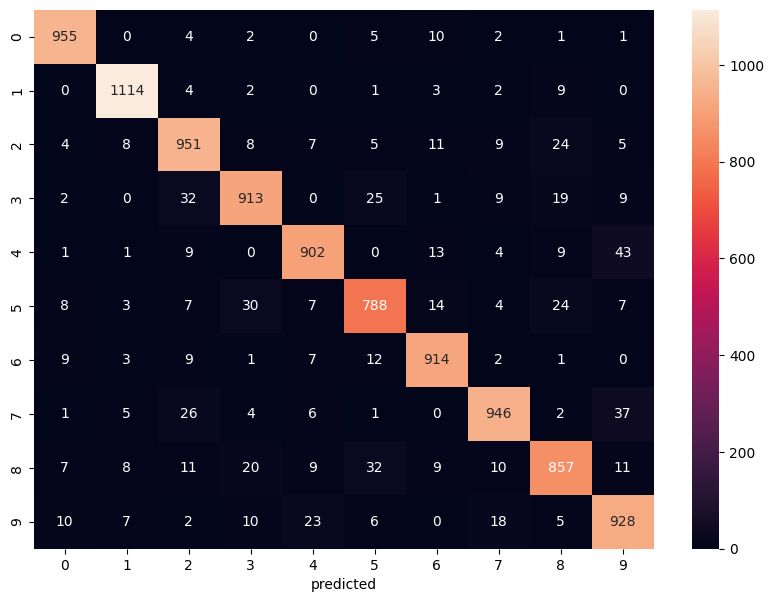

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('predicted')


In [ ]:
#  HERE WE CAN ALSO DIRECTLY CRETATE A FLLATEN LAYER WHICH CAN HELP US IN GETTING QUITE GOOD ACCURACY
# IT CAN BE DONE Y DIRECTLY INSERTING '.flatten' layer inside keras;
#  ' keras.layers.Flatten(input_shape = (28,28)),'

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100,input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])